# Credit Card Default Analysis

#### Default Payments of Credit Card Clients in Taiwan from 2005

## 1. Import Data
Data source from Kaggle: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset <br>
Original data source: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


In [1]:
# Import packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read file into dataframe and print out dataframe shapef
df = pd.read_csv("UCI_Credit_Card.csv")
df.shape

(30000, 25)

## 2. Understand the Data

In [3]:
# Examine the first 10 rows of the data
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


### (1) Description of columns from dataset documentation
There are 25 variables: <br>
•   ID: ID of each client    <br>
•   LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit  <br>
•	SEX: Gender (1=male, 2=female)  <br>
•	EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
•	MARRIAGE: Marital status (1=married, 2=single, 3=others) <br>
•	AGE: Age in years  <br>
•	PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)  <br>
•	PAY_2: Repayment status in August, 2005 (scale same as above)  <br>
•	PAY_3: Repayment status in July, 2005 (scale same as above)  <br>
•	PAY_4: Repayment status in June, 2005 (scale same as above)  <br>
•	PAY_5: Repayment status in May, 2005 (scale same as above)  <br>
•	PAY_6: Repayment status in April, 2005 (scale same as above) <br>
•	BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br>
•	BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) <br>
•	BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br>
•	BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) <br>
•	BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) <br>
•	BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br>
•	PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
•	PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) <br>
•	PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) <br>
•	PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) <br>
•	PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br>
•	PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) <br>
•	default.payment.next.month: Default payment (1=yes, 0=no) <br>

In [4]:
# Understand the data by printing out all column names

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
# Understand the data by checking the first row

df.loc[0]

ID                                1.0
LIMIT_BAL                     20000.0
SEX                               2.0
EDUCATION                         2.0
MARRIAGE                          1.0
AGE                              24.0
PAY_0                             2.0
PAY_2                             2.0
PAY_3                            -1.0
PAY_4                            -1.0
PAY_5                            -2.0
PAY_6                            -2.0
BILL_AMT1                      3913.0
BILL_AMT2                      3102.0
BILL_AMT3                       689.0
BILL_AMT4                         0.0
BILL_AMT5                         0.0
BILL_AMT6                         0.0
PAY_AMT1                          0.0
PAY_AMT2                        689.0
PAY_AMT3                          0.0
PAY_AMT4                          0.0
PAY_AMT5                          0.0
PAY_AMT6                          0.0
default.payment.next.month        1.0
Name: 0, dtype: float64

### (2) What do 0 and -2 mean in Pay_X columns?

From dataset documentation: 
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above). Then What does 0 and -2 mean? These are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation. 

After searching online, I realized the same question was asked by others, and the answer from the dataset contributor was:

#### -2: No consumption; <br>-1: Paid in full; <br>0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608

In [6]:
# Sort the repayment status codes in PAY_X columns by melting them into 1 column
# Notice there are 2 undocumented codes: 0,-2

pay = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: value, dtype: int64


### (3) What does 'default.payment.next.month' mean?
Is it a predictor or actual data that was collected in the next month - Oct. 2005? According to the reply from the dataset contributor,it seems this is the actual data collected in the next month. "Y: client's behavior; Y=0 then not default, Y=1 then default". This information could be used to test the accuracy of the model that will be built.

In [7]:
# Get the proportion of customers who had default payment in the next month (Oct.2005)? 
# About 22% customers had default payment next month

df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

## 3. Data Cleanning

### (1) Check missing values, column type and column names
There is no missing value, all columns have the correct type, and all columns are named consistently since we have renamed the last inconsistent column name to 'DEF_PAY_NMO.

In [8]:
# Check column names, columan data type and indentify any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [9]:
# Change inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DEF_PAY_NMO'

df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAY_NMO'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

### (2) Check duplicate records
There are no duplicate IDs or rows.

In [10]:
# Check if there is any duplicate IDs
condition = bool(df.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


### (3) Identify outliers

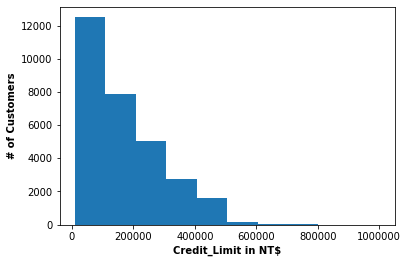

In [11]:
# Use histogram to view the distribution of credit limit

plt.hist(df["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

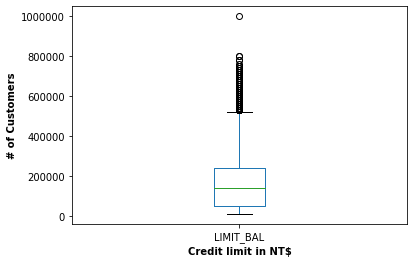

In [12]:
# Use boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

In [13]:
# Take a close look at the outlier
# The observations from other columns indicate that this was just a customer who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = df.loc[df['LIMIT_BAL']>900000]
outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
2197,2198,1000000.0,2,1,1,47,0,0,0,-1,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


### (4) Check numerical columns

In [14]:
# Get the statistic summary of the columns
# No data is extremly unresonable in these columns

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### (5) Check categorical columns

Next, we will check these 3 columns: SEX',	'EDUCATION' and	'MARRIAGE'.	The 'SEX' column looks fine, while 'EDUCATION' and 'MARRIAGE' columns have some undocumented data and 'EDUCATION' column has duplicated values in different codes.

In [15]:
# Get SEX column's distribution. 1: male; 2: female
# No undocumented SEX code

df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [16]:
# Change sex code to 'F' and 'M' and use category as datatype

df["SEX"]=df["SEX"].map({1:'M',2:'F'}).astype('category')
df["SEX"].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

'EDUCATION' column: notice 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.

In [17]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [18]:
# Get the total counts of each EDUCATION level

df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [19]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

'MARRIAGE' column: what does 0 mean in 'MARRIAGE'?
Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'.

In [20]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [21]:
# How many customers had "MARRIAGE" status as 0?

df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [22]:
# Combine 0 and 3 by changing the value 0 into 3

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

## 4. Trends, Hypotheses and Findings

In [23]:
# Set ID as datafram index

df.set_index('ID', inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,F,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,F,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,F,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,F,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,M,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_0 to Pay_6
# 0 : no default ; 1: has default

def_condition = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0


#### (1) On average, which sex group tends to have more delayed payments? Since there are more female than male in the dataset, we will use percentage within each sex group.

30% male have default payment while 26% female have default payment, the difference is not significant.

In [25]:
# Get the percentage of default male and default female

default_by_sex = pd.crosstab(index=df['HAS_DEF'],columns = df['SEX'], normalize = 'columns')
default_by_sex = default_by_sex.apply(lambda x: round(x,2))

default_by_sex 

SEX,F,M
HAS_DEF,,
0.0,0.74,0.7
1.0,0.26,0.3


In [26]:
# Define a function to plot stacked bar chart since it will be used multiple times later on

def create_stacked_bar(labels,list1,list2,list1_name,list2_name,title,xlabel,ylabel):

    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.3
    
    list1 = list1
    list2 = list2

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    plt.xticks(list(range(len(labels))), labels)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()
    

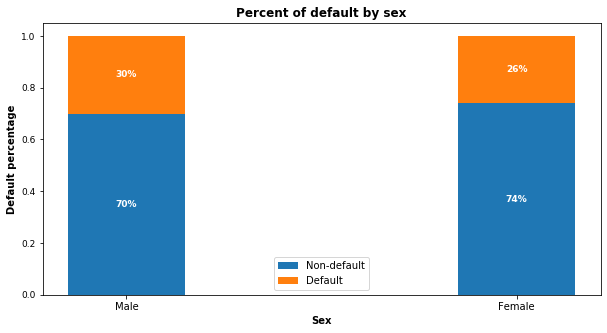

In [27]:
# Plot a stacked bar chart to visualize default percentage by female and male

labels = ["Male","Female"]
list1 = [0.7,0.74]
list2 = [0.3,0.26]
list1_name = "Non-default"
list2_name = "Default"
title = "Percent of default by sex"
xlabel = "Sex"
ylabel = "Default percentage"

create_stacked_bar(labels,list1,list2,list1_name,list2_name,title,xlabel,ylabel)


#### (2) Did customers with higher education have less delayed payment?

The data indicates customers with lower education levels default more. Customers with high school and university educational level had higher default percentages than customers with grad school education did. 

In [28]:
# Get the percentage of default and non-default by education group
# 0:'others',1:'grad school',2: 'university',3: 'high school'

default_by_edu = pd.crosstab(index=df['HAS_DEF'],columns = df['EDUCATION'], normalize = 'columns')
default_by_edu = default_by_edu.apply(lambda x: round(x,2))

default_by_edu 

EDUCATION,0,1,2,3
HAS_DEF,,,,
0.0,0.89,0.78,0.69,0.67
1.0,0.11,0.22,0.31,0.33


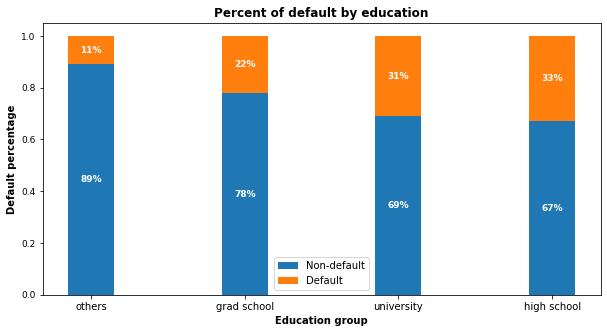

In [29]:
# Plot a stacked bar chart to show default by education level

labels = ['others','grad school', 'university', 'high school']
list1 = [0.89,0.78,0.69,0.67]
list2 = [0.11,0.22,0.31,0.33] 
list1_name = "Non-default"
list2_name = "Default"
title = "Percent of default by education"
xlabel = "Education group"
ylabel = "Default percentage"

create_stacked_bar(labels,list1,list2,list1_name,list2_name,title,xlabel,ylabel)


#### (3) Did customers with a high education level get higher credit limits?
From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

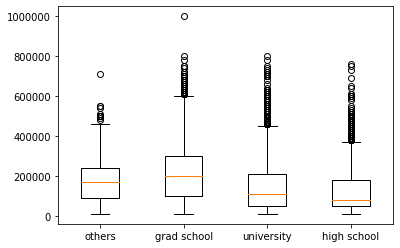

In [30]:
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [0,1,2,3]:
    temp = df.loc[df.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()


#### (4) Does marital status have anything to do with default risk? Note the credit limit includes the family's total credit.
There is no difference of default risk in terms of marital status, although the 'other'marital status group had high default percentage.

In [31]:
# Get the percentage of default and non-default by marital group
# 1: 'Married',2:'Single',3:'Others'

default_by_mar = pd.crosstab(index=df['HAS_DEF'],columns = df['MARRIAGE'], normalize = 'columns')
default_by_mar = default_by_mar.apply(lambda x: round(x,2))

default_by_mar

MARRIAGE,1,2,3
HAS_DEF,,,
0.0,0.72,0.72,0.69
1.0,0.28,0.28,0.31


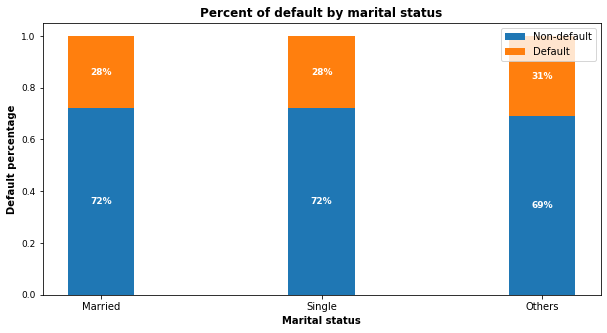

In [32]:
# Plot a stacked bar chart to visualize default and non-default distribution by marital status 

labels = ["Married","Single","Others"]
list1 = [0.72,0.72,0.69]
list2 = [0.28,0.28,0.31]
list1_name = "Non-default"
list2_name = "Default"
title = "Percent of default by marital status"
xlabel = "Marital status"
ylabel = "Default percentage"

create_stacked_bar(labels,list1,list2,list1_name,list2_name,title,xlabel,ylabel)



#### (5) Do younger people tend to miss the payment deadline?

Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.


In [33]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AGE'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)


In [34]:
# Get the percentage of default and non-default by "AGE" group

default_by_age = pd.crosstab(index=df['HAS_DEF'],columns = df['AGE'], normalize = 'columns')
default_by_age = default_by_age.apply(lambda x: round(x,2))

default_by_age

AGE,20-30,30-40,40-50,50-60,60-70,70-80
HAS_DEF,,,,,,
0.0,0.68,0.75,0.74,0.7,0.69,0.72
1.0,0.32,0.25,0.26,0.3,0.31,0.28


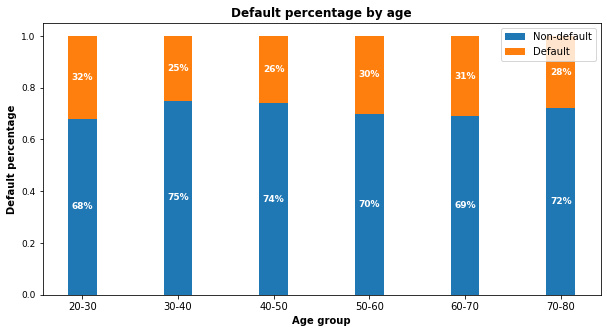

In [35]:
# Plot a stacked bar chart to visualize default and non-default by age

labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
list1 = [0.68,0.75,0.74,0.7,0.69,0.72]
list2 = [0.32,0.25,0.26,0.3,0.31,0.28]
list1_name = "Non-default"
list2_name = "Default"
title = "Default percentage by age"
xlabel = "Age group"
ylabel = "Default percentage"

create_stacked_bar(labels,list1,list2,list1_name,list2_name,title,xlabel,ylabel)



#### (6) Has the repayment status changed in the 6 month from April 2005 (PAY_6) to September 2005(PAY_0)? 
There was a huge jump from May,2005 (PAY_5) to July, 2005 (PAY_3) when delayed payment increased significantly, then it peaked at August, 2005 (PAY_2), things started to get better in September, 2005 (PAY_1). 

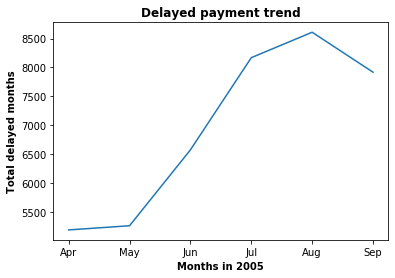

In [36]:
# Subset a dataframe with the records that have default

has_default = df[df['HAS_DEF']== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

# Draw a line chart to show the trend. The lower number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

#### (7) Is there any correlation between bill amount and the delayed time?

There isn't an obvious correlation between bill amount and the total months of delay.

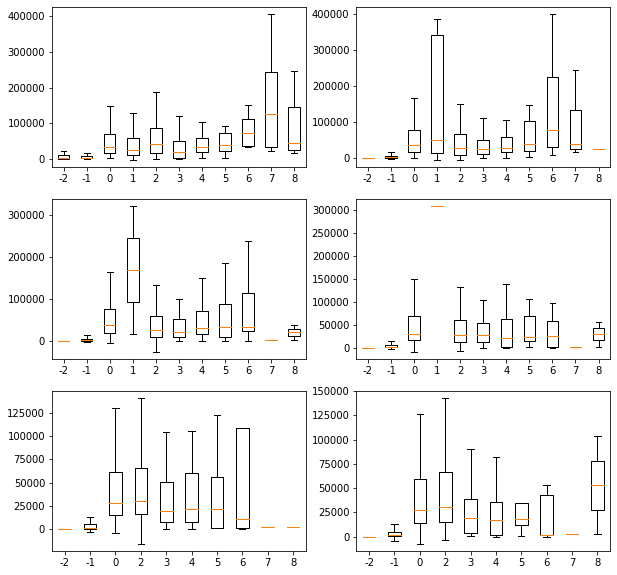

In [37]:
# Make 6 boxplots to visualize bill amounts and the total months of delayed payment

from matplotlib.pyplot import figure

# Make "PAY_1" to"PAY_6" , 'BILL_AMT1" to'BILL_AMT6" into a list respectively
pay_list = [ f"PAY_{i}" for i in range(1, 7) ]
bill_amt_list = [ f"BILL_AMT{i}" for i in range(1, 7) ]

fig, ax = plt.subplots(3,2, figsize=(10, 10))

for pay, bill_amt, myax in zip(pay_list, bill_amt_list, ax.flatten()):
    
    # Prepare data for boxploting
    data = []
    for i in sorted(has_default[pay].unique()):
        temp = has_default.loc[has_default[pay] == i, bill_amt]
        data.append(temp)
        
    # Make boxplot for each PAY variable
    myax.boxplot(data, showfliers=False,) 
    myax.set_xticklabels(sorted(has_default[pay].unique()))
    
plt.show()

#### (8) Is there any correlation between credit limit and the default payment next month?

Unsurprisingly, customers who had higher credit limits had lower delayed payment rates.

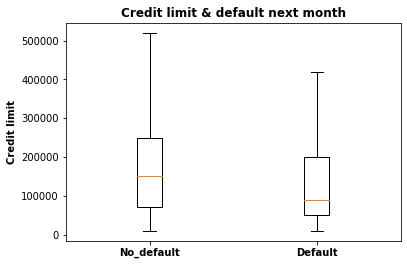

In [38]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

def0 = df.loc[df['DEF_PAY_NMO'] == 0,'LIMIT_BAL']
def1 = df.loc[df['DEF_PAY_NMO'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()


#### (9) Why are there negative bills?

Interestingly enough, the minimals of those 6 bill columns are negative numbers. In general, there are 599-688 bills with negative amounts each month, which is less than 2% of total 30,000 records monthly. Also, the average negative amount in USD is $38 - $102 which is a small amount. Therefore, an informed guess would be these are refunds from the last billing cycle. This will be investigated in data analysis.

In [39]:
# Get statistic summary of bill statement columns
# The min numbers are negative

bill = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bill.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [40]:
# How many bills have negative amount?
# There are 3932 bills with negative amounts, each month has 599-688 records 

bill_melt = pd.melt(bill, var_name = 'bill_cycle',value_name = 'amount')
neg_bill = bill_melt[bill_melt['amount']<0]
neg_bill.groupby('bill_cycle').count()


,amount
bill_cycle,
BILL_AMT1,590
BILL_AMT2,669
BILL_AMT3,655
BILL_AMT4,675
BILL_AMT5,655
BILL_AMT6,688


In [41]:
# Get the average amount of negative bill each month
# Use USD/NTD = 30 to get the amount in USD. The average negative amount is $38-$102

neg_bill_mean_ndt = neg_bill.groupby('bill_cycle')['amount'].mean()

print('Average negative amounts in NTD are: \n')
print(neg_bill_mean_ndt)
print('\nAverage negative amounts in USD are: \n')
print(neg_bill_mean_ndt/30)


Average negative amounts in NTD are: 

bill_cycle
BILL_AMT1   -1154.796610
BILL_AMT2   -1230.621824
BILL_AMT3   -1466.291603
BILL_AMT4   -1631.242963
BILL_AMT5   -1634.708397
BILL_AMT6   -3074.492733
Name: amount, dtype: float64

Average negative amounts in USD are: 

bill_cycle
BILL_AMT1    -38.493220
BILL_AMT2    -41.020727
BILL_AMT3    -48.876387
BILL_AMT4    -54.374765
BILL_AMT5    -54.490280
BILL_AMT6   -102.483091
Name: amount, dtype: float64


#### (10) Why are some bill statement amounts greater than credit limit? Could it be late payment interest?

The common sense is that the bill statement amount shouldn't exceed credit limit, however, there are 3931 customers whose bill amounts are greater than credit limit. Could the difference be late payment interest assuming these customers had delayed payment? We will explore this at the data analysis phase.

In [42]:
# Is there any bill amount that is greater than credit limit?

condition1 = df['BILL_AMT1'] > df['LIMIT_BAL'] 
condition2 = df['BILL_AMT2'] > df['LIMIT_BAL'] 
condition3 = df['BILL_AMT3'] > df['LIMIT_BAL'] 
condition4 = df['BILL_AMT4'] > df['LIMIT_BAL'] 
condition5 = df['BILL_AMT5'] > df['LIMIT_BAL'] 
condition6 = df['BILL_AMT6'] > df['LIMIT_BAL'] 

large_bill = df[condition1 | condition2 |condition3 | condition4 | condition5 | condition6]
large_bill.shape

(3931, 25)

#### (11) Why did customers who had no consumption in 6 months then default in the next month?

First explore if there is any customer who never had consumption and the data shows there are 870 customers who were inactive in 6 months. Then check against the 'default.payment.next.month' column to see if these customers all had no default. The common sense should be no default payment next month if the previous bill was 0. However, we see there are 317 "1"s which means default in the next month. We will investigate this in the data analysis process.

In [43]:
# Is there any customer who never had any transaction, meaning bill amount in 6 months remained as 0
# There are 870 customers whose bill amount was 0 in 6 months

bill_amt = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
no_transaction = bill_amt[bill_amt.sum(axis=1) ==0]
no_transaction

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,
19,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0
46,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0
122,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
29909,0.0,0.0,0.0,0.0,0.0,0.0
29910,0.0,0.0,0.0,0.0,0.0,0.0
29974,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Check if those 870 customers defaulted in the next month (Oct.2005)
# The assumption is since they did not have any consumption, they shouldn't default, so there shouldn't be any '1'

no_transaction_de = df.loc[no_transaction.index,['DEF_PAY_NMO']]
no_transaction_de

,DEF_PAY_NMO
ID,
19,0
20,0
46,1
80,1
122,1
...,...
29909,1
29910,0
29974,1


In [45]:
# How many inactive customers had default payment next month
# 317 customers had default payment next month which is against common sense

no_transaction_de['DEF_PAY_NMO'].value_counts()

0    553
1    317
Name: DEF_PAY_NMO, dtype: int64